In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv


# **IMPORTING THE REQUIRED LIBRARIES**

In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# **LOADING THE DATASET**

In [3]:
df=pd.read_csv("/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
#Checking for null values
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

# **EXPLORATORY DATA ANALYSIS**

In [5]:
fig = px.scatter(df, y="Salary", x="YearsExperience", color="YearsExperience")
fig.update_traces(marker_size=8)

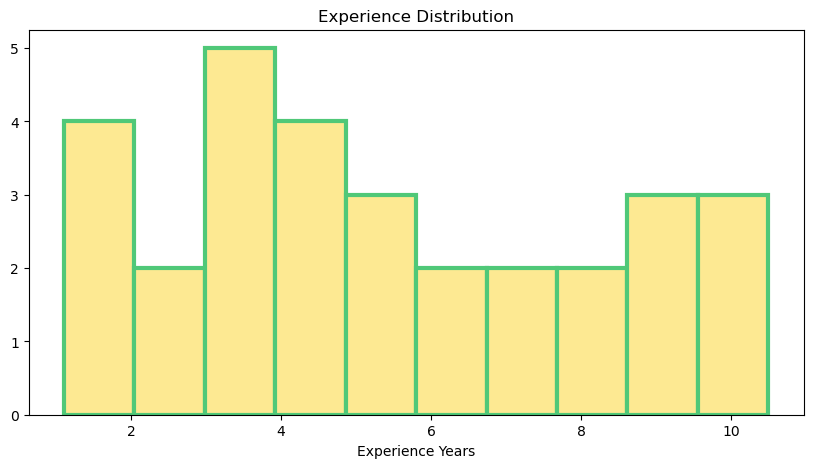

In [6]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(df["YearsExperience"],color='#FDE992',ec="#50C878", lw=3)
plt.title('Experience Distribution')
plt.xlabel('Experience Years')
plt.show()

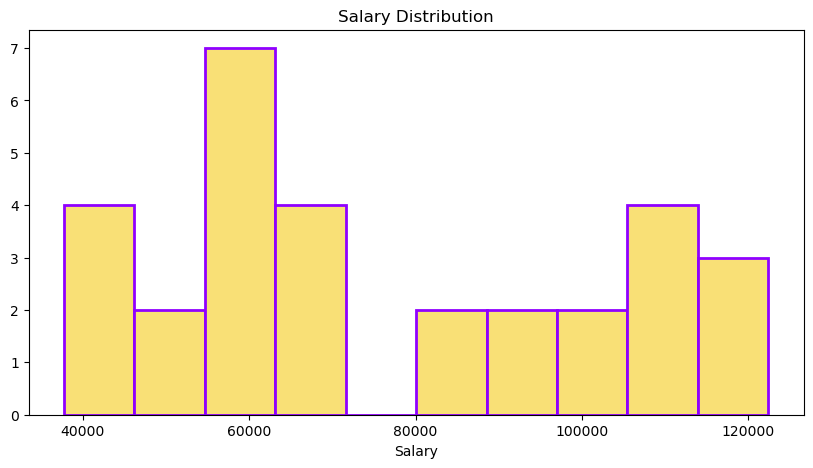

In [7]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(df["Salary"],color='#F9E076',ec="#8F00FF", lw=2)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

<Axes: >

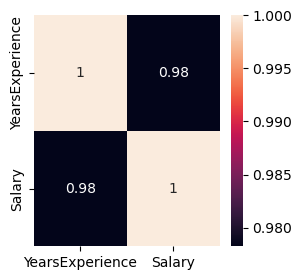

In [8]:
plt.figure(figsize=[3,3])
sns.heatmap(df.corr(),annot=True)

**From the EDA, we can infer that:**

1) Years of Experience and Salary are highly correlated to each other.

2) As years of experience increases, salary also increases.

# **SPLITTING INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [9]:
#Dependent variable
y=df['Salary']

In [10]:
#Independent variable
X=df.drop(columns='Salary',axis=1)
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


# **SPLITTING INTO TRAIN AND TEST DATA**

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# **SIMPLE LINEAR REGRESSION**

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() # initialzing the model
model.fit(X_train,y_train) # fitting the model on training data

LinearRegression()

# **TESTING THE MODEL**

In [13]:
y_pred=model.predict(X_test)

# **EVALUATION METRICS**

In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error: 3737.417861878896
Mean Squared Error: 23370078.800832972
Root Mean Squared Error: 4834.260936361728


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9740993407213511

# **PLOTTING PREDICTED VALUES AND ACTUAL VALUES**

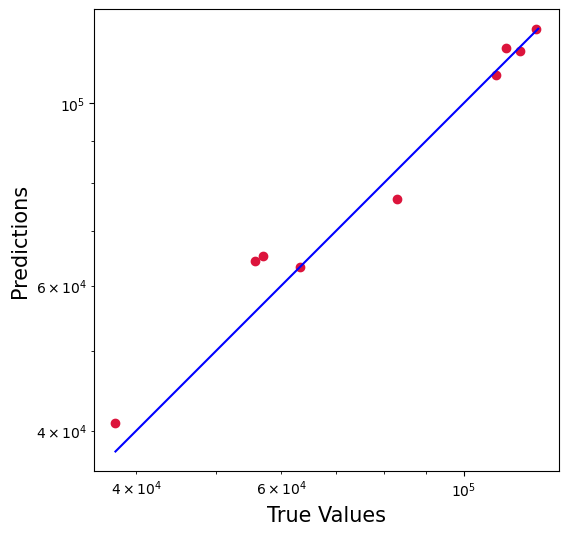

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

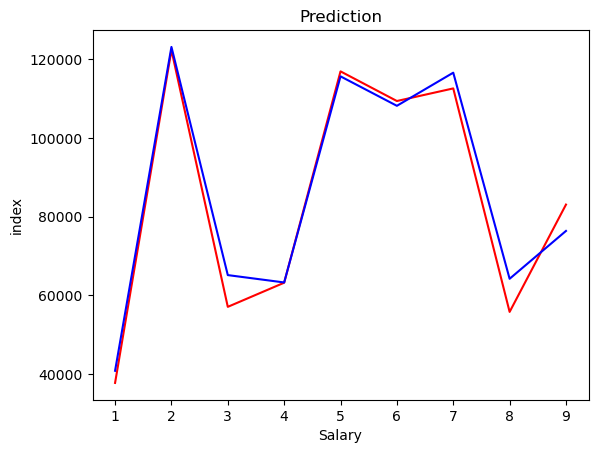

In [17]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

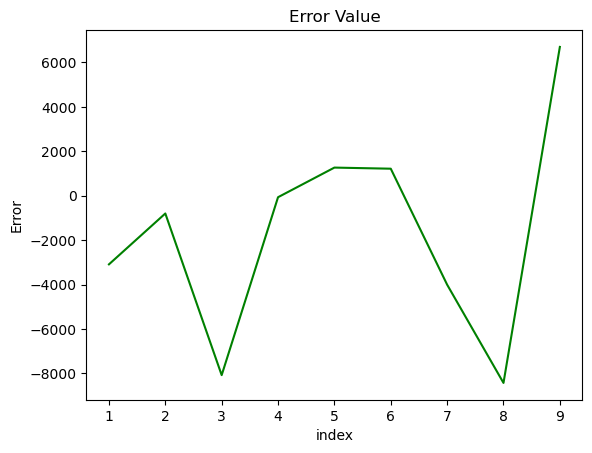

In [18]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()
